In [288]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [289]:
df=pd.read_excel("water.xlsx")
pd.set_option("display.max_columns",None)
df

,Well No,District,Tahsil / Taluk,Village,Latitude,Longitude,Date of collection,TDS,NO2+NO3,Ca,Mg,Na,K,Cl,SO4,CO3,HCO3,F,pH_GEN,EC_GEN,HAR_Total,SAR,RSC,Na%,WnQn(Ph),Unnamed: 25,WnQn(Ca),WnQn(Mg),WnQn(F),WnQn(Ec),WnQn(Har),WnQn(TDS),WaterQualityIndex,Quality
0,13206,Kancheepuram,Chengalpattu,Palavakkam,"12°57'45""","80°15'30""",2015-01-02,947.0,15.0,114.0,15.795,198.0,18.0,365.0,85.0,66.000000,36.6000,0.10,8.4,1610.0,350.0,4.607230,0.0,53.621050,10.911507,NaN,2.013953,1.743990,6.900879,1.777666,0.386449,0.376424,24.110868,EXCELLENT
1,11902,Kancheepuram,Chengalpattu,Nenmeli,"12°39'57""","80°01'03""",2015-01-02,235.0,2.0,28.0,29.160,9.0,0.1,25.0,28.0,3.219945,171.6803,0.20,8.3,420.0,190.0,0.284126,0.0,9.341172,10.132113,NaN,0.494655,3.219674,13.801758,0.463739,0.209787,0.093410,28.415137,GOOD
2,11904,Kancheepuram,Chengalpattu,Nathankariyachery,"12°34'17""","80°06'30""",2015-01-02,791.0,5.0,68.0,53.460,150.0,0.1,252.0,74.0,0.000000,341.6000,0.70,8.1,1430.0,390.0,3.305434,0.0,45.563590,8.573327,NaN,1.201305,5.902736,48.306154,1.578921,0.430615,0.314415,66.307473,POOR
3,13008,Kancheepuram,Thirukazhukkuntram,Agathy Mangalam,"12°35'20""","80°10'40""",2015-01-02,331.0,4.0,50.0,31.590,21.0,0.1,78.0,25.0,3.219945,171.6803,0.50,8.3,620.0,255.0,0.572320,0.0,15.196960,10.132113,NaN,0.883313,3.487980,34.504396,0.684567,0.281556,0.131569,50.105495,POOR
4,13011A,Kancheepuram,Madurandagam,Madurandagam,"12°31'36""","79°53'12""",2015-01-02,666.0,2.0,16.0,60.750,150.0,0.1,202.0,76.0,0.000000,305.0000,0.80,8.2,1230.0,290.0,3.832237,0.0,52.939720,9.352720,NaN,0.282660,6.707655,55.207034,1.358093,0.320201,0.264729,73.493091,POOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,11718,Kancheepuram,Uthiramerur,Uthiramerur,"12°36'59""","79°45'43""",2019-07-02,791.0,2.0,48.0,52.245,173.0,19.0,393.0,34.0,24.000000,79.3000,0.37,8.5,1470.0,335.0,4.113057,0.0,51.171520,11.690900,NaN,0.847980,5.768583,25.533253,1.623087,0.369887,0.314415,46.148105,GOOD
1167,11750,Kancheepuram,Uthiramerur,Sethanacheri,"12°40'47""","79°45'16""",2019-07-02,771.0,2.0,50.0,59.535,164.0,19.0,383.0,29.0,24.000000,67.1000,0.39,8.4,1500.0,370.0,3.710023,0.0,47.513600,10.911507,NaN,0.883313,6.573501,26.913429,1.656211,0.408532,0.306465,47.652958,GOOD
1168,13010,Kancheepuram,Uthiramerur,Menalur,"12°35'01""","79°44'29""",2019-07-02,795.0,2.0,56.0,43.740,180.0,19.0,393.0,34.0,24.000000,73.2000,0.38,8.4,1470.0,320.0,4.378927,0.0,53.228040,10.911507,NaN,0.989310,4.829511,26.223341,1.623087,0.353325,0.316005,45.246086,GOOD
1169,MWW26,Kancheepuram,Uthiramerur,Perunager-2,"12°39'03""","79°38'59""",2019-07-02,815.0,3.0,62.0,49.815,166.0,19.0,386.0,46.0,36.000000,73.2000,0.44,8.5,1510.0,360.0,3.807365,0.0,48.460930,11.690900,NaN,1.095308,5.500277,30.363868,1.667252,0.397491,0.323955,51.039051,POOR


In [290]:
df.drop("Unnamed: 25",axis=1)

,Well No,District,Tahsil / Taluk,Village,Latitude,Longitude,Date of collection,TDS,NO2+NO3,Ca,Mg,Na,K,Cl,SO4,CO3,HCO3,F,pH_GEN,EC_GEN,HAR_Total,SAR,RSC,Na%,WnQn(Ph),WnQn(Ca),WnQn(Mg),WnQn(F),WnQn(Ec),WnQn(Har),WnQn(TDS),WaterQualityIndex,Quality
0,13206,Kancheepuram,Chengalpattu,Palavakkam,"12°57'45""","80°15'30""",2015-01-02,947.0,15.0,114.0,15.795,198.0,18.0,365.0,85.0,66.000000,36.6000,0.10,8.4,1610.0,350.0,4.607230,0.0,53.621050,10.911507,2.013953,1.743990,6.900879,1.777666,0.386449,0.376424,24.110868,EXCELLENT
1,11902,Kancheepuram,Chengalpattu,Nenmeli,"12°39'57""","80°01'03""",2015-01-02,235.0,2.0,28.0,29.160,9.0,0.1,25.0,28.0,3.219945,171.6803,0.20,8.3,420.0,190.0,0.284126,0.0,9.341172,10.132113,0.494655,3.219674,13.801758,0.463739,0.209787,0.093410,28.415137,GOOD
2,11904,Kancheepuram,Chengalpattu,Nathankariyachery,"12°34'17""","80°06'30""",2015-01-02,791.0,5.0,68.0,53.460,150.0,0.1,252.0,74.0,0.000000,341.6000,0.70,8.1,1430.0,390.0,3.305434,0.0,45.563590,8.573327,1.201305,5.902736,48.306154,1.578921,0.430615,0.314415,66.307473,POOR
3,13008,Kancheepuram,Thirukazhukkuntram,Agathy Mangalam,"12°35'20""","80°10'40""",2015-01-02,331.0,4.0,50.0,31.590,21.0,0.1,78.0,25.0,3.219945,171.6803,0.50,8.3,620.0,255.0,0.572320,0.0,15.196960,10.132113,0.883313,3.487980,34.504396,0.684567,0.281556,0.131569,50.105495,POOR
4,13011A,Kancheepuram,Madurandagam,Madurandagam,"12°31'36""","79°53'12""",2015-01-02,666.0,2.0,16.0,60.750,150.0,0.1,202.0,76.0,0.000000,305.0000,0.80,8.2,1230.0,290.0,3.832237,0.0,52.939720,9.352720,0.282660,6.707655,55.207034,1.358093,0.320201,0.264729,73.493091,POOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,11718,Kancheepuram,Uthiramerur,Uthiramerur,"12°36'59""","79°45'43""",2019-07-02,791.0,2.0,48.0,52.245,173.0,19.0,393.0,34.0,24.000000,79.3000,0.37,8.5,1470.0,335.0,4.113057,0.0,51.171520,11.690900,0.847980,5.768583,25.533253,1.623087,0.369887,0.314415,46.148105,GOOD
1167,11750,Kancheepuram,Uthiramerur,Sethanacheri,"12°40'47""","79°45'16""",2019-07-02,771.0,2.0,50.0,59.535,164.0,19.0,383.0,29.0,24.000000,67.1000,0.39,8.4,1500.0,370.0,3.710023,0.0,47.513600,10.911507,0.883313,6.573501,26.913429,1.656211,0.408532,0.306465,47.652958,GOOD
1168,13010,Kancheepuram,Uthiramerur,Menalur,"12°35'01""","79°44'29""",2019-07-02,795.0,2.0,56.0,43.740,180.0,19.0,393.0,34.0,24.000000,73.2000,0.38,8.4,1470.0,320.0,4.378927,0.0,53.228040,10.911507,0.989310,4.829511,26.223341,1.623087,0.353325,0.316005,45.246086,GOOD
1169,MWW26,Kancheepuram,Uthiramerur,Perunager-2,"12°39'03""","79°38'59""",2019-07-02,815.0,3.0,62.0,49.815,166.0,19.0,386.0,46.0,36.000000,73.2000,0.44,8.5,1510.0,360.0,3.807365,0.0,48.460930,11.690900,1.095308,5.500277,30.363868,1.667252,0.397491,0.323955,51.039051,POOR


In [291]:
df.isnull().sum()

Well No                  0
District                 0
Tahsil / Taluk           0
Village                  0
Latitude               140
Longitude              140
Date of collection       0
TDS                      7
NO2+NO3                  7
Ca                       7
Mg                       7
Na                       9
K                        9
Cl                       9
SO4                      9
CO3                      7
HCO3                     7
F                        7
pH_GEN                   7
EC_GEN                   7
HAR_Total                7
SAR                      7
RSC                      7
Na%                      7
WnQn(Ph)                 0
Unnamed: 25           1171
WnQn(Ca)                 0
WnQn(Mg)                 0
WnQn(F)                  0
WnQn(Ec)                 0
WnQn(Har)                0
WnQn(TDS)                0
WaterQualityIndex        0
Quality                  0
dtype: int64

In [292]:
print(df.shape)
print(df.Quality)

(1171, 34)
0       EXCELLENT
1            GOOD
2            POOR
3            POOR
4            POOR
          ...    
1166         GOOD
1167         GOOD
1168         GOOD
1169         POOR
1170         GOOD
Name: Quality, Length: 1171, dtype: object


<AxesSubplot:xlabel='Quality', ylabel='count'>

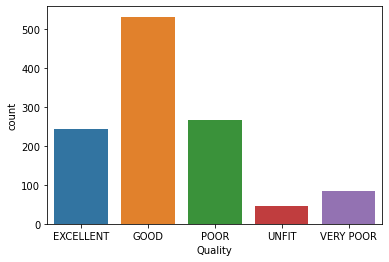

In [293]:
sb.countplot(x="Quality",data=df)


<AxesSubplot:xlabel='Quality', ylabel='TDS'>

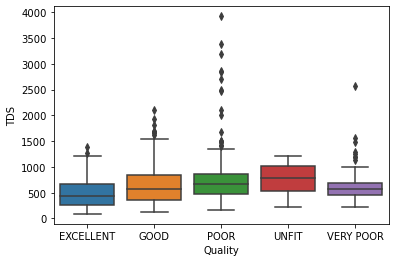

In [294]:
sb.boxplot(x="Quality",y="TDS",data=df)


In [295]:
X = df[['WnQn(Ph)',  'WnQn(Ca)', 'WnQn(Mg)','WnQn(F)','WnQn(Ec)','WnQn(Har)','WnQn(TDS)']]
y = df['Quality']

In [296]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=53)

### NaiveBayes

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
  

In [298]:
y_pred = gnb.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)
print(classification_report(y_test,y_pred))


[[ 54  11   0   0   0]
 [  3 161   3   0   0]
 [  0  18  57   0   4]
 [  0   0   0  10   7]
 [  0   0   1   0  23]]
86.64772727272727
              precision    recall  f1-score   support

   EXCELLENT       0.95      0.83      0.89        65
        GOOD       0.85      0.96      0.90       167
        POOR       0.93      0.72      0.81        79
       UNFIT       1.00      0.59      0.74        17
   VERY POOR       0.68      0.96      0.79        24

    accuracy                           0.87       352
   macro avg       0.88      0.81      0.83       352
weighted avg       0.88      0.87      0.86       352



In [299]:
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 86.64772727272727


### KNN Classifier

In [300]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


In [301]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)
print(classification_report(y_test,y_pred))


[[ 64   1   0   0   0]
 [  5 158   4   0   0]
 [  0   7  72   0   0]
 [  0   0   0  16   1]
 [  0   0   5   1  18]]
93.18181818181817
              precision    recall  f1-score   support

   EXCELLENT       0.93      0.98      0.96        65
        GOOD       0.95      0.95      0.95       167
        POOR       0.89      0.91      0.90        79
       UNFIT       0.94      0.94      0.94        17
   VERY POOR       0.95      0.75      0.84        24

    accuracy                           0.93       352
   macro avg       0.93      0.91      0.92       352
weighted avg       0.93      0.93      0.93       352



### XGboost

In [302]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

C:\Users\Pratik\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:41:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [303]:
y_pred = xgb.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[ 63,   2,   0,   0,   0],
       [  1, 163,   3,   0,   0],
       [  0,   7,  72,   0,   0],
       [  0,   0,   0,  16,   1],
       [  0,   0,   4,   1,  19]], dtype=int64)

In [304]:
accuracy_score(y_test,y_pred)*100

94.60227272727273

In [310]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

   EXCELLENT       0.97      0.91      0.94        65
        GOOD       0.93      0.96      0.95       167
        POOR       0.89      0.92      0.91        79
       UNFIT       1.00      0.82      0.90        17
   VERY POOR       0.86      0.79      0.83        24

    accuracy                           0.93       352
   macro avg       0.93      0.88      0.90       352
weighted avg       0.93      0.93      0.93       352



### RandomForest

In [307]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [309]:
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)
print(classification_report(y_test,y_pred))

[[ 59   6   0   0   0]
 [  2 161   4   0   0]
 [  0   6  73   0   0]
 [  0   0   0  14   3]
 [  0   0   5   0  19]]
92.61363636363636
              precision    recall  f1-score   support

   EXCELLENT       0.97      0.91      0.94        65
        GOOD       0.93      0.96      0.95       167
        POOR       0.89      0.92      0.91        79
       UNFIT       1.00      0.82      0.90        17
   VERY POOR       0.86      0.79      0.83        24

    accuracy                           0.93       352
   macro avg       0.93      0.88      0.90       352
weighted avg       0.93      0.93      0.93       352

